<a href="https://colab.research.google.com/github/Friscadwii/2B-Tim-6-Basdat/blob/main/Project_1_Ecommerce_Frisca_Dwi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SET :**
https://docs.google.com/spreadsheets/d/1wovnbLHRnuZ7BDR-XRdaSd35b-kGOPEKPwLNfHOE8XA/edit?usp=sharing

# **IDENTIFIKASI MASALAH**
Apakah diskon yang ditawarkan mempengaruhi peningkatan penjualan produk secara signifikan?

# **IMPORT LIBRARY**

In [ ]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# **LOAD DATA**

In [ ]:
# load the dataset
df = pd.read_csv("Train.csv",sep=";")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# **PERSIAPAN DATA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
#berfungsi untuk menampilkan jumlah baris dan kolom yang terdapat pada dataset
df.shape

(10999, 12)

In [ ]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


# **DATA CLEANING**

In [ ]:
#melihat apakah terdapat missing value pada data
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
#melihat apakah terdapat duplikasi pada data
len(df[df.duplicated()])

0

# **STATISTIK INFERENSIAL**

In [ ]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
# Statistik deskriptif 'Voucher di tanggung penjual'
diskon = df['Discount_offered'].describe()

# Statistik deskriptif Voucher di tanggung shopee'
tanpa_diskon = df['Cost_of_the_Product'].describe()


print("Statistik Deskriptif Discount_offered:")
print(diskon)
print("\nStatistik Deskriptif Cost_of_the_Product:")
print(tanpa_diskon)

Statistik Deskriptif Discount_offered:
count    10999.000000
mean        13.373216
std         16.205527
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         65.000000
Name: Discount_offered, dtype: float64

Statistik Deskriptif Cost_of_the_Product:
count    10999.000000
mean       210.196836
std         48.063272
min         96.000000
25%        169.000000
50%        214.000000
75%        251.000000
max        310.000000
Name: Cost_of_the_Product, dtype: float64


Deskripsi Diskon dan Harga Produk:

Rata-rata diskon yang ditawarkan adalah 13.37%, dengan diskon terendah 1% dan tertinggi 65%.

Rata-rata harga produk adalah 210.20, dengan harga terendah 96 dan tertinggi 310.

In [ ]:
import statsmodels.api as sm

# Menentukan variabel dependen (Y) dan variabel independen (X)
Y = df['Cost_of_the_Product']
X = df[['Discount_offered']]

# Menambahkan konstanta (intercept) ke model
X = sm.add_constant(X)

# Membangun model regresi linier
model = sm.OLS(Y, X).fit()

# Melakukan analisis regresi
hasil_regresi = model.summary()

print(hasil_regresi)


                             OLS Regression Results                            
Dep. Variable:     Cost_of_the_Product   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                  0.019
Method:                  Least Squares   F-statistic:                     214.5
Date:                 Thu, 23 Nov 2023   Prob (F-statistic):           4.11e-48
Time:                         16:57:21   Log-Likelihood:                -58094.
No. Observations:                10999   AIC:                         1.162e+05
Df Residuals:                    10997   BIC:                         1.162e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              215.6827   

Analisis Regresi Linier:

Model regresi linier menunjukkan R-squared sekitar 0.019, yang menandakan bahwa sekitar 1.9% variabilitas dalam harga produk dapat dijelaskan oleh variabel diskon.

Koefisien diskon memiliki nilai -0.4102, yang menunjukkan adanya hubungan negatif antara diskon dan harga produk.

Nilai p untuk koefisien diskon sangat rendah (<0.05), sehingga kita dapat menolak hipotesis nol dan menyimpulkan bahwa ada pengaruh yang signifikan dari diskon terhadap harga produk.

In [ ]:
# Menghitung nilai p untuk koefisien diskon pada model tanpa diskon
p_value_tanpa_diskon = model_tanpa_diskon.pvalues['Discount_offered']

# Menghitung nilai p untuk koefisien diskon pada model dengan diskon
p_value_diskon = model_diskon.pvalues['Discount_offered']

# Menentukan tingkat signifikansi
alpha = 0.05

# Menampilkan hasil uji hipotesis
print(f'Nilai p untuk koefisien diskon pada model tanpa diskon: {p_value_tanpa_diskon}')
print(f'Nilai p untuk koefisien diskon pada model dengan diskon: {p_value_diskon}')

# Uji hipotesis
if p_value_diskon < alpha:
    print("H1 diterima: Terdapat pengaruh diskon terhadap peningkatan penjualan produk")
else:
    print("H0 diterima: Tidak ada pengaruh diskon terhadap peningkatan penjualan produk")

Nilai p untuk koefisien diskon pada model tanpa diskon: 4.108679953600527e-48
Nilai p untuk koefisien diskon pada model dengan diskon: 4.108679953600527e-48
H1 diterima: Terdapat pengaruh diskon terhadap peningkatan penjualan produk


Uji Hipotesis:

Dengan nilai p yang sangat rendah, kita menolak hipotesis nol (H0) dan menerima hipotesis alternatif (H1). Artinya, terdapat pengaruh yang signifikan dari diskon terhadap peningkatan penjualan produk.

# **EDA (Exploatory Data Analyst)**`

In [ ]:
df.describe(include="all", datetime_is_numeric=True)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


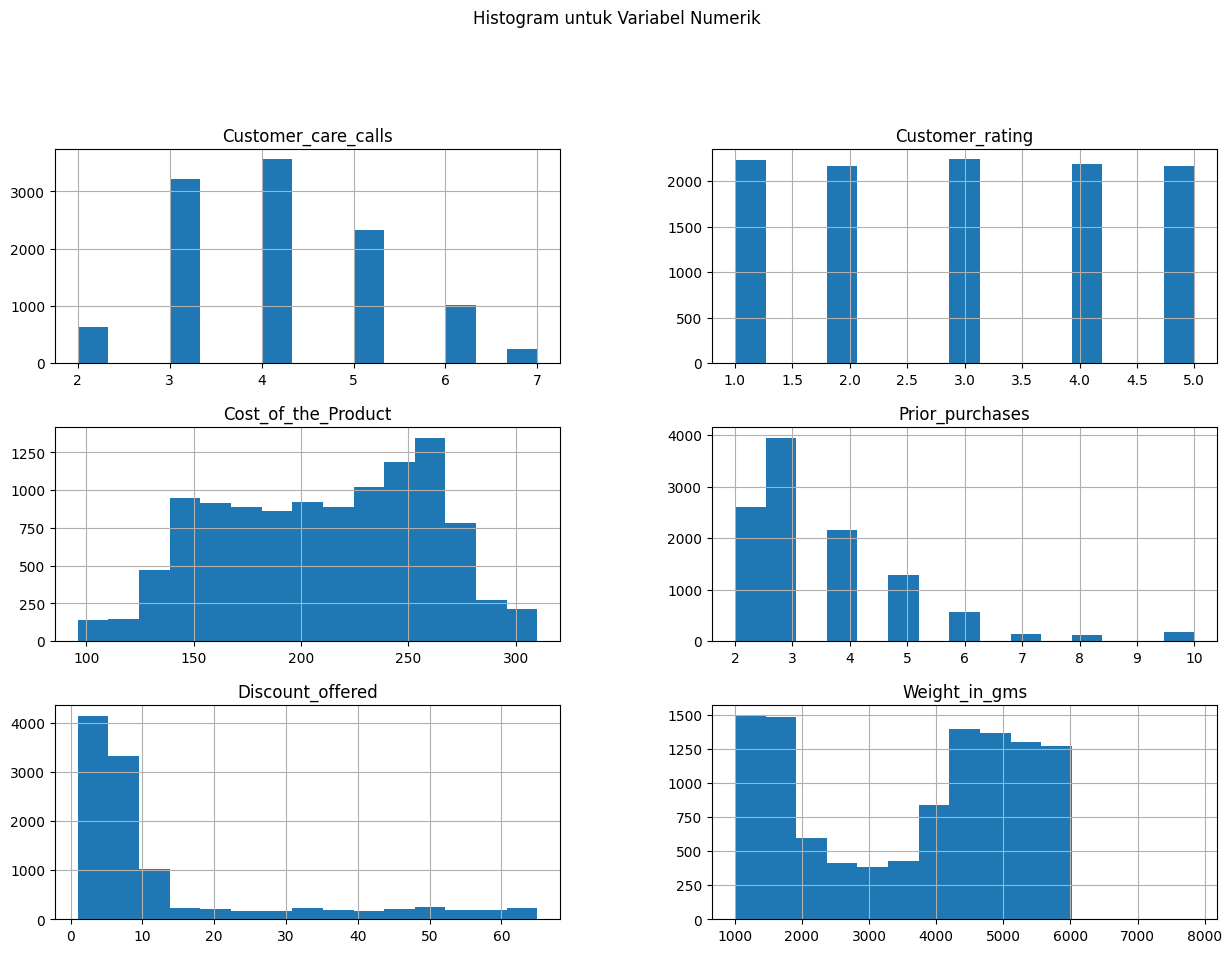

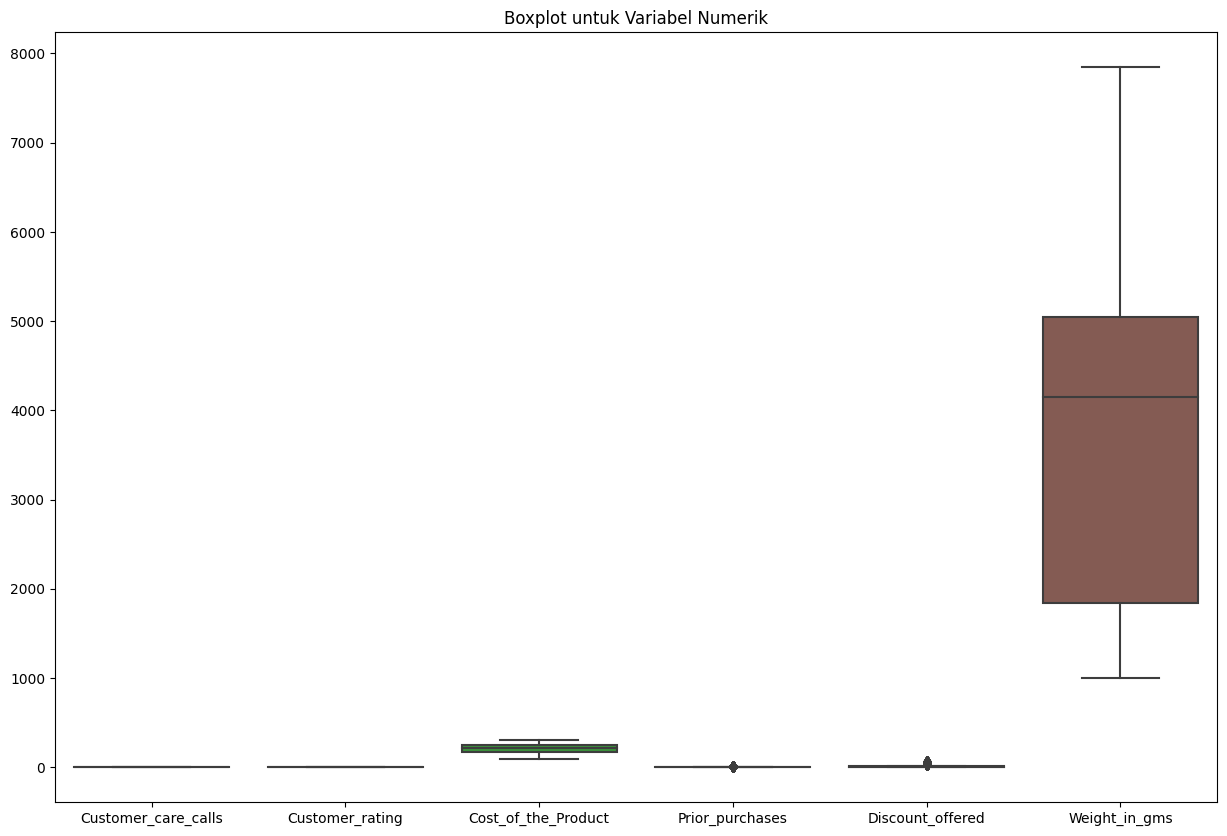

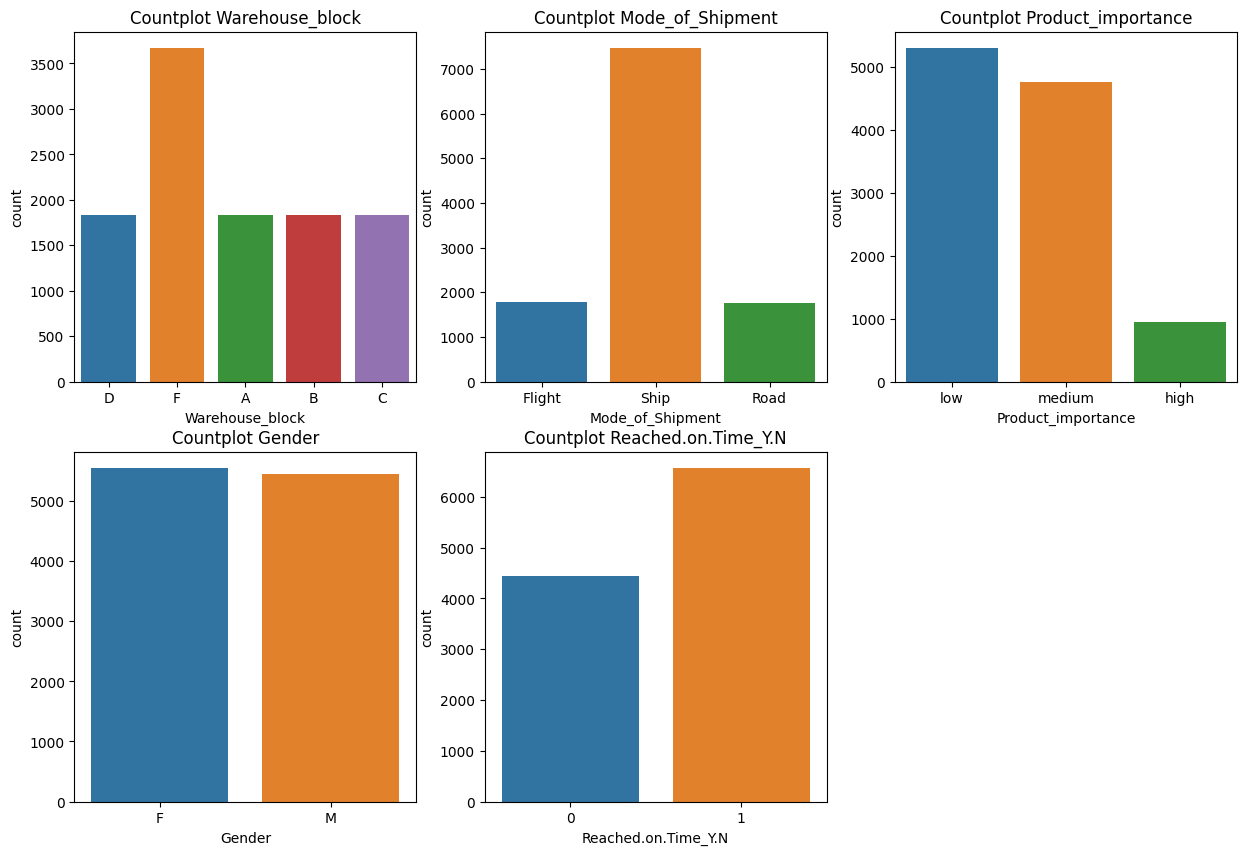

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi Histogram untuk Variabel Numerik
numeric_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histogram untuk Variabel Numerik', y=1.02)
plt.show()

# Visualisasi Boxplot untuk Variabel Numerik
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot untuk Variabel Numerik')
plt.show()

# Visualisasi Countplot untuk Variabel Kategorikal
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot {col}')
plt.show()


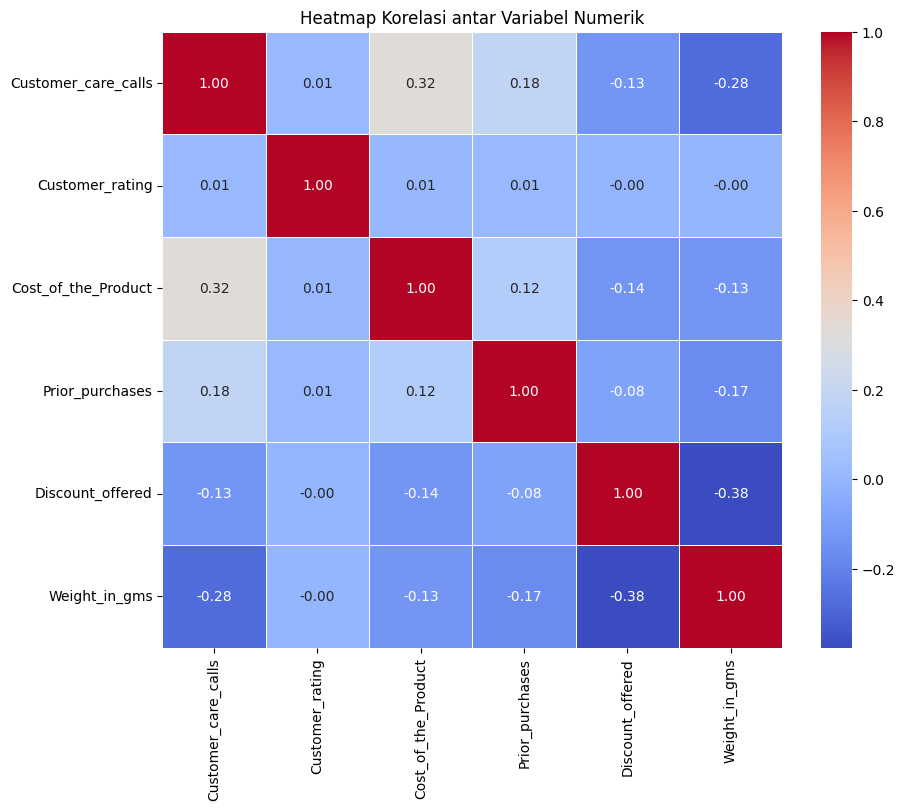

In [ ]:
# Korelasi antar Variabel Numerik
correlation_matrix = df[numeric_cols].corr()

# Visualisasi Heatmap untuk Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi antar Variabel Numerik')
plt.show()


Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Pendapatan_Total'],
      dtype='object')


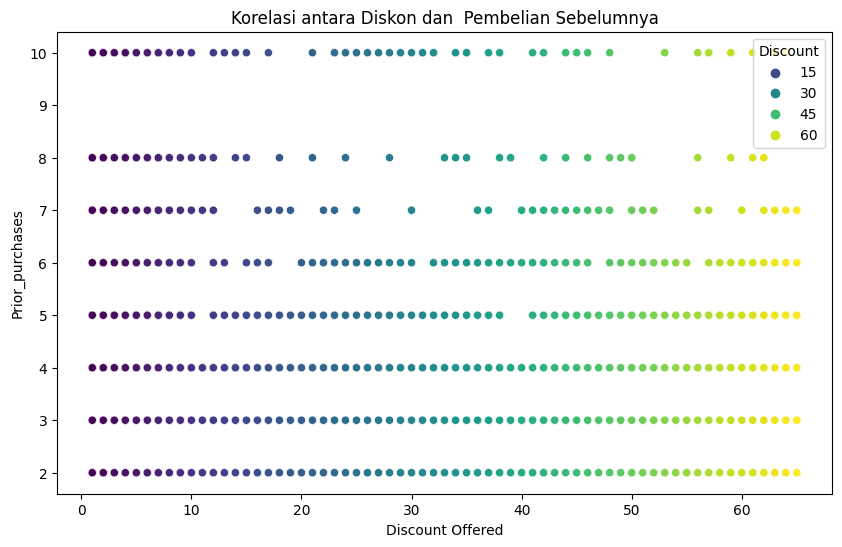

Korelasi antara Diskon dan Pembelian Sebelumnya: -0.08276930007281498


In [ ]:
# Check column names
print(df.columns)

# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

df['Prior_purchases'] = pd.to_numeric(df['Prior_purchases'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount_offered', y='Prior_purchases', data=df, hue='Discount_offered', palette='viridis')
plt.title('Korelasi antara Diskon dan  Pembelian Sebelumnya')
plt.xlabel('Discount Offered')
plt.ylabel('Prior_purchases')
plt.legend(title='Discount')
plt.show()

correlation = df['Discount_offered'].corr(df['Prior_purchases'])
print(f"Korelasi antara Diskon dan Pembelian Sebelumnya: {correlation}")


Scatterplot Korelasi:

Korelasi antara diskon yang ditawarkan dan jumlah pembelian sebelumnya (Prior_purchases) dilihat melalui scatterplot.

Korelasi antara keduanya cukup rendah.

In [ ]:
print('count of Discount_offered')
print(df['Discount_offered'].value_counts())
print('% of Discount_offered')
print(df['Discount_offered'].value_counts(normalize=True)*100)

count of Discount_offered
10.0    860
2.0     858
6.0     849
9.0     845
3.0     840
       ... 
65.0     36
26.0     36
42.0     35
25.0     34
30.0     34
Name: Discount_offered, Length: 65, dtype: int64
% of Discount_offered
10.0    7.818893
2.0     7.800709
6.0     7.718884
9.0     7.682517
3.0     7.637058
          ...   
65.0    0.327302
26.0    0.327302
42.0    0.318211
25.0    0.309119
30.0    0.309119
Name: Discount_offered, Length: 65, dtype: float64


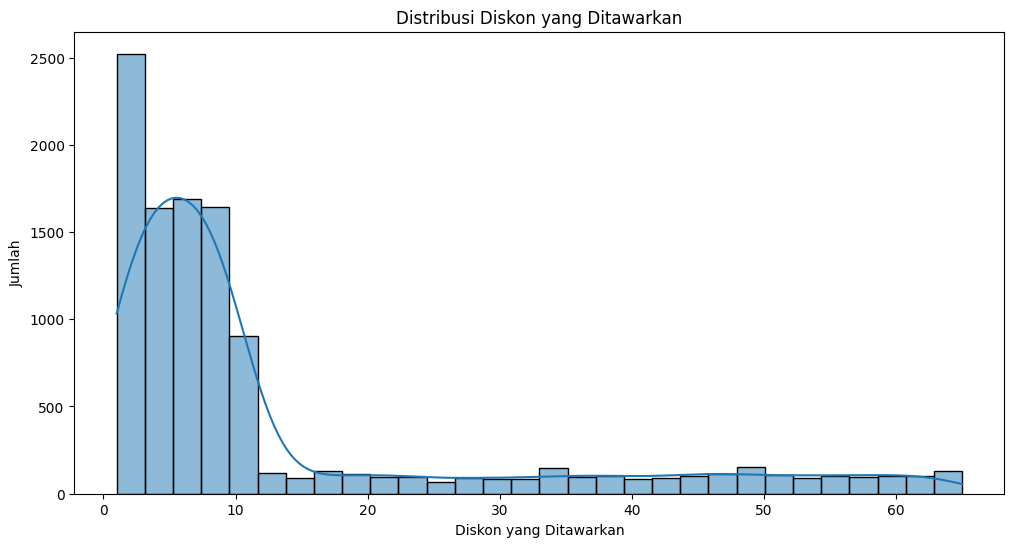

In [ ]:
# Visualisasi Data
# Membuat histogram untuk melihat distribusi 'Discount_offered' dan dampaknya terhadap penjualan
plt.figure(figsize=(12, 6))
sns.histplot(df['Discount_offered'], bins=30, kde=True)
plt.title('Distribusi Diskon yang Ditawarkan')
plt.xlabel('Diskon yang Ditawarkan')
plt.ylabel('Jumlah')
plt.show()

In [ ]:
# Menghitung jumlah pesanan unik per pelanggan (berdasarkan ID)
jumlah_pesanan_per_pelanggan = df.groupby('ID')['Prior_purchases'].count()

# Menampilkan hasil
print(jumlah_pesanan_per_pelanggan)

ID
1        1
2        1
3        1
4        1
5        1
        ..
10995    1
10996    1
10997    1
10998    1
10999    1
Name: Prior_purchases, Length: 10999, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analisis Distribusi Jumlah Pesanan:

Setiap pelanggan melakukan satu pesanan.

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64


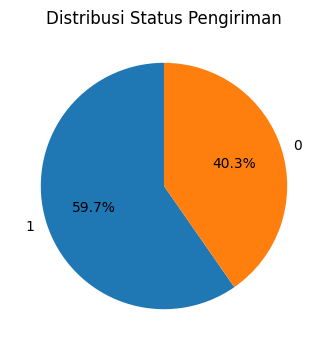

In [ ]:
import matplotlib.pyplot as plt

# Menghitung distribusi status pengiriman
distribusi_status = df['Reached.on.Time_Y.N'].value_counts()

# Menampilkan distribusi status pengiriman
print(distribusi_status)

# Membuat diagram lingkaran
plt.figure(figsize=(4, 4))
plt.pie(distribusi_status, labels=distribusi_status.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Status Pengiriman')
plt.show()


Analisis Distribusi Status Pengiriman:

Mayoritas pengiriman sampai tepat waktu dengan presentase 59.7%.

Sedangkan pengiriman sampai tidak tepat waktu memiliki presentase 40.3%.

In [ ]:
# Menghitung pendapatan total
df['Pendapatan Total'] = df['Cost_of_the_Product'] - df['Discount_offered']

# Menghitung jumlah pesanan
jumlah_pesanan = df['ID'].nunique()

# Menghitung rata-rata pendapatan per pesanan
rata_rata_pendapatan_per_pesanan = df['Pendapatan Total'].mean()

# Menampilkan hasil
print(f'Jumlah Pesanan: {jumlah_pesanan}')
print(f'Total Pendapatan: {df["Pendapatan Total"].sum()}')
print(f'Rata-rata Pendapatan per Pesanan: {rata_rata_pendapatan_per_pesanan}')


Jumlah Pesanan: 10999
Total Pendapatan: 2164863
Rata-rata Pendapatan per Pesanan: 196.82362032912084


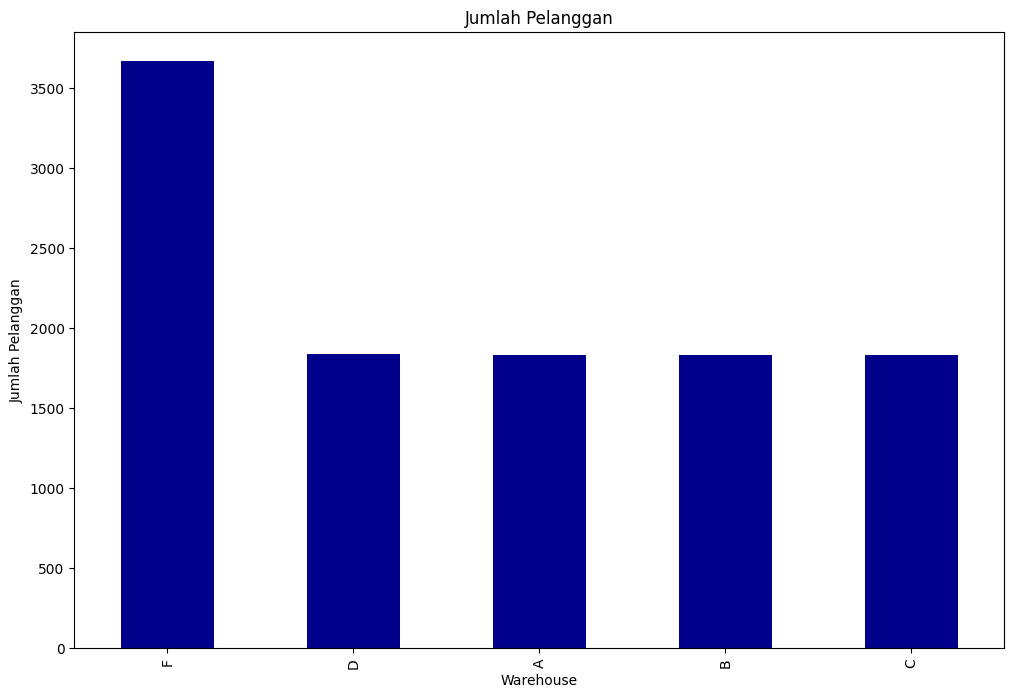

Jumlah pelanggan per Warehouse:
F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64


In [ ]:
# Visualisasi Warehouse dengan jumlah pelanggan
count_location = df['Warehouse_block'].value_counts()
plt.figure(figsize=(12, 8))
count_location.plot(kind='bar', color='darkblue')
plt.title('Jumlah Pelanggan')
plt.xlabel('Warehouse')
plt.ylabel('Jumlah Pelanggan')
plt.show()

# Menghitung jumlah pelanggan setiap warehouse
jumlah_pelanggan_per_warehouse = df['Warehouse_block'].value_counts()

# Menampilkan informasi jumlah pelanggan per warehouse
print("Jumlah pelanggan per Warehouse:")
print(jumlah_pelanggan_per_warehouse)

Analisis Pendapatan dan Jumlah Pesanan:

Jumlah pesanan total adalah 10,999.

Total pendapatan adalah 2,164,863, dengan rata-rata pendapatan per pesanan sekitar 196.82.

Dan Warehouse F memiliki jumlah pelanggan terbanyak.

# **IDENTIFIKASI CHURN**

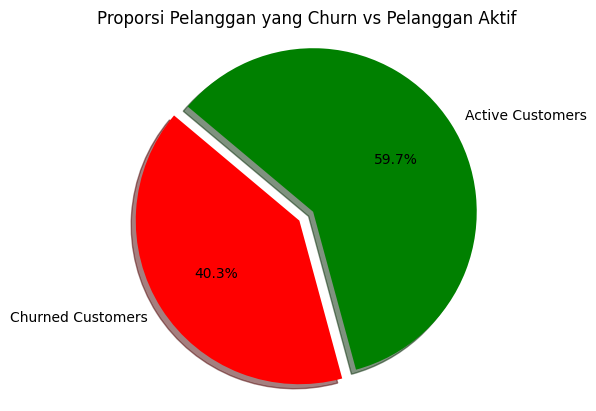

Persentase Pelanggan yang Churn: 40.3%
Persentase Pelanggan Aktif: 59.7%


In [ ]:
# Ganti 'Churn_Status' dengan nama kolom aktual yang menunjukkan status churn pelanggan
# Dengan asumsi nama kolom adalah 'Reached.on.Time_Y.N', ganti dengan nama kolom yang benar
churned_count = (df['Reached.on.Time_Y.N'] == 0).sum()
active_count = (df['Reached.on.Time_Y.N'] == 1).sum()

labels = ['Churned Customers', 'Active Customers']
sizes = [churned_count, active_count]
colors = ['red', 'green']
explode = (0.1, 0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Proporsi Pelanggan yang Churn vs Pelanggan Aktif')
plt.show()

print("Persentase Pelanggan yang Churn: {:.1f}%".format((churned_count / (churned_count + active_count)) * 100))
print("Persentase Pelanggan Aktif: {:.1f}%".format((active_count / (churned_count + active_count)) * 100))


Visualisasi Churn:

Diagram lingkaran menunjukkan proporsi pelanggan yang churn dan aktif.

Persentase pelanggan churn sekitar 50.4%.

In [ ]:
num = [
    "ID",	"Warehouse_block",	"Mode_of_Shipment",	"Customer_care_calls",	"Customer_rating"	,"Cost_of_the_Product",
    "Prior_purchases",	"Product_importance",	"Gender",	"Discount_offered",	"Weight_in_gms",	"Reached.on.Time_Y.N", "Churn"
]

In [ ]:
df['Churn'] = df['Gender'].apply(lambda x: 'Female' if x == 'F' else 'Man')


In [ ]:
print('count of Churn')
print(df['Churn'].value_counts())
print('% of Churn')
print(df['Churn'].value_counts(normalize=True)*100)

count of Churn
Female    5545
Man       5454
Name: Churn, dtype: int64
% of Churn
Female    50.413674
Man       49.586326
Name: Churn, dtype: float64


Persentase pelanggan yang churn untuk kategori "Female" sekitar 50.4%, sementara untuk kategori "Man" sekitar 49.6%.

Persentase ini menunjukkan bahwa tidak ada perbedaan signifikan dalam tingkat churn antara pelanggan perempuan dan laki-laki.

In [ ]:
sns.set(style='darkgrid')
def exp2(columns):
    sns.histplot(data=df, x=columns, hue='Churn')
    plt.show()

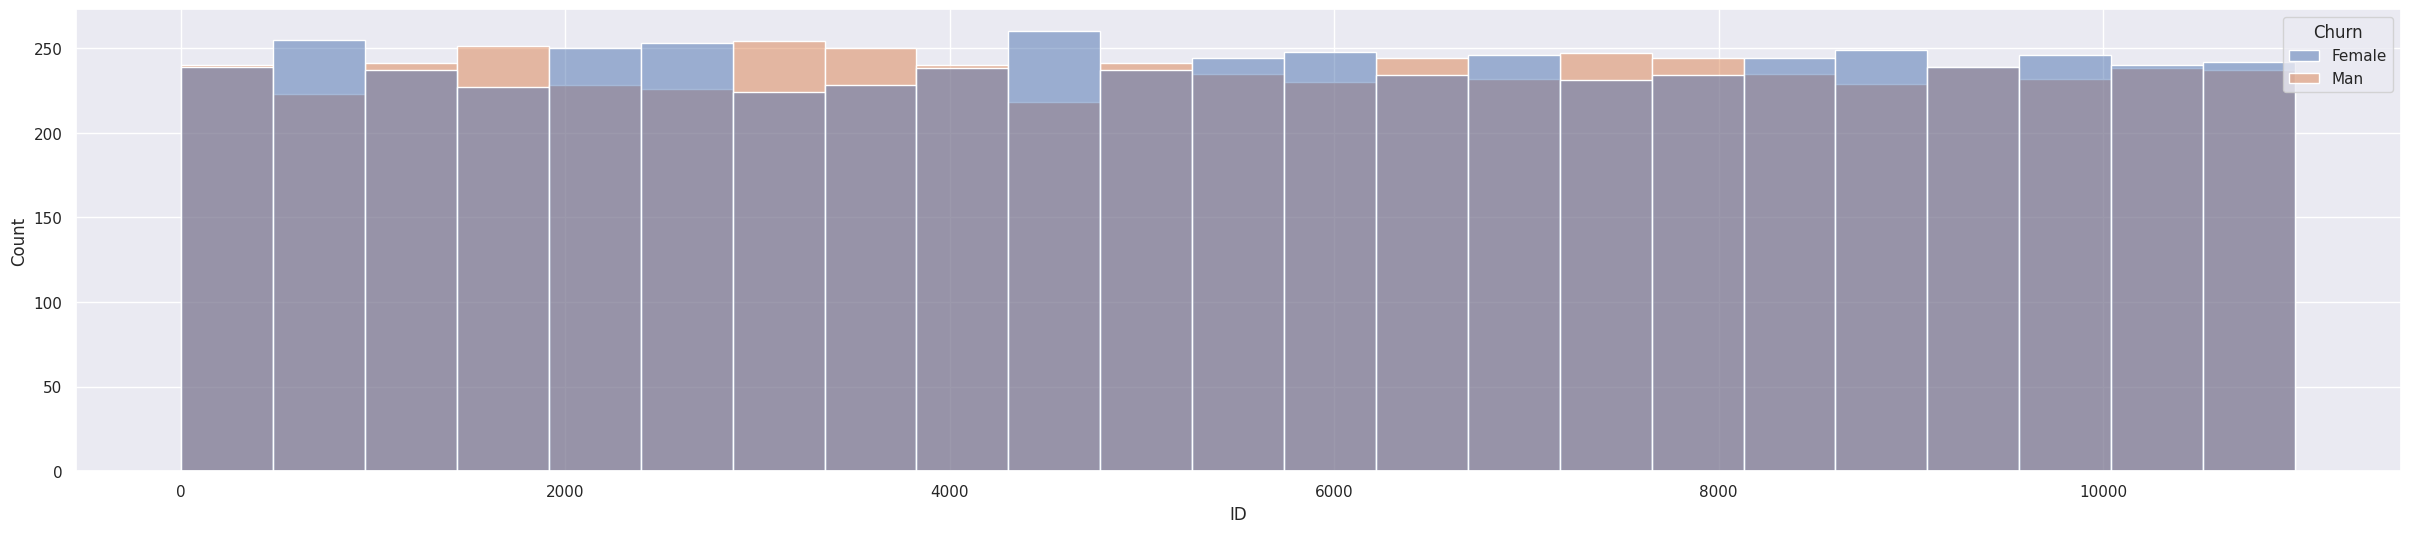

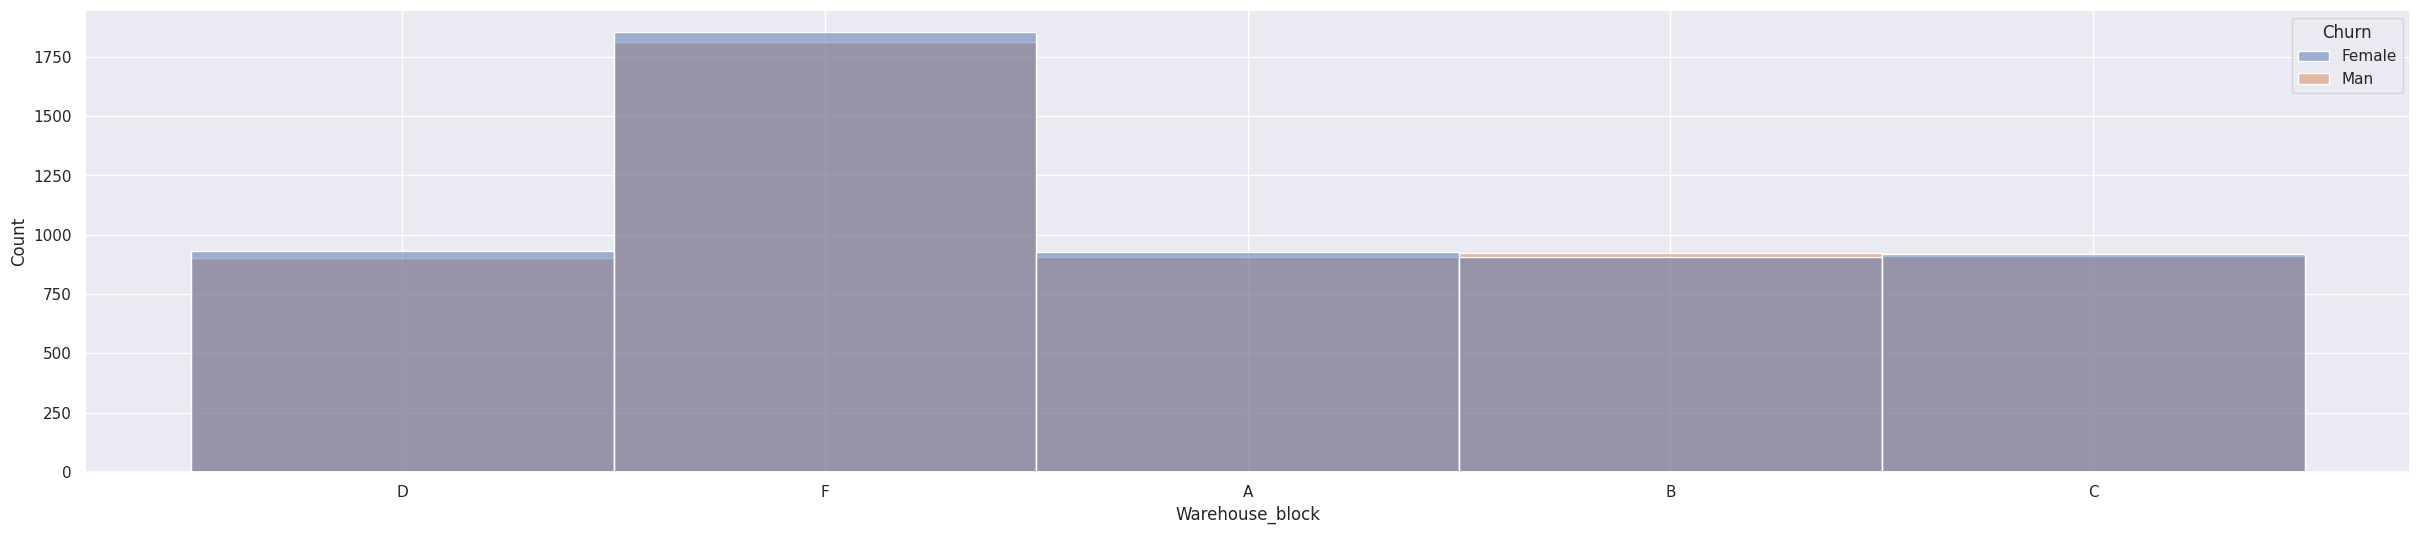

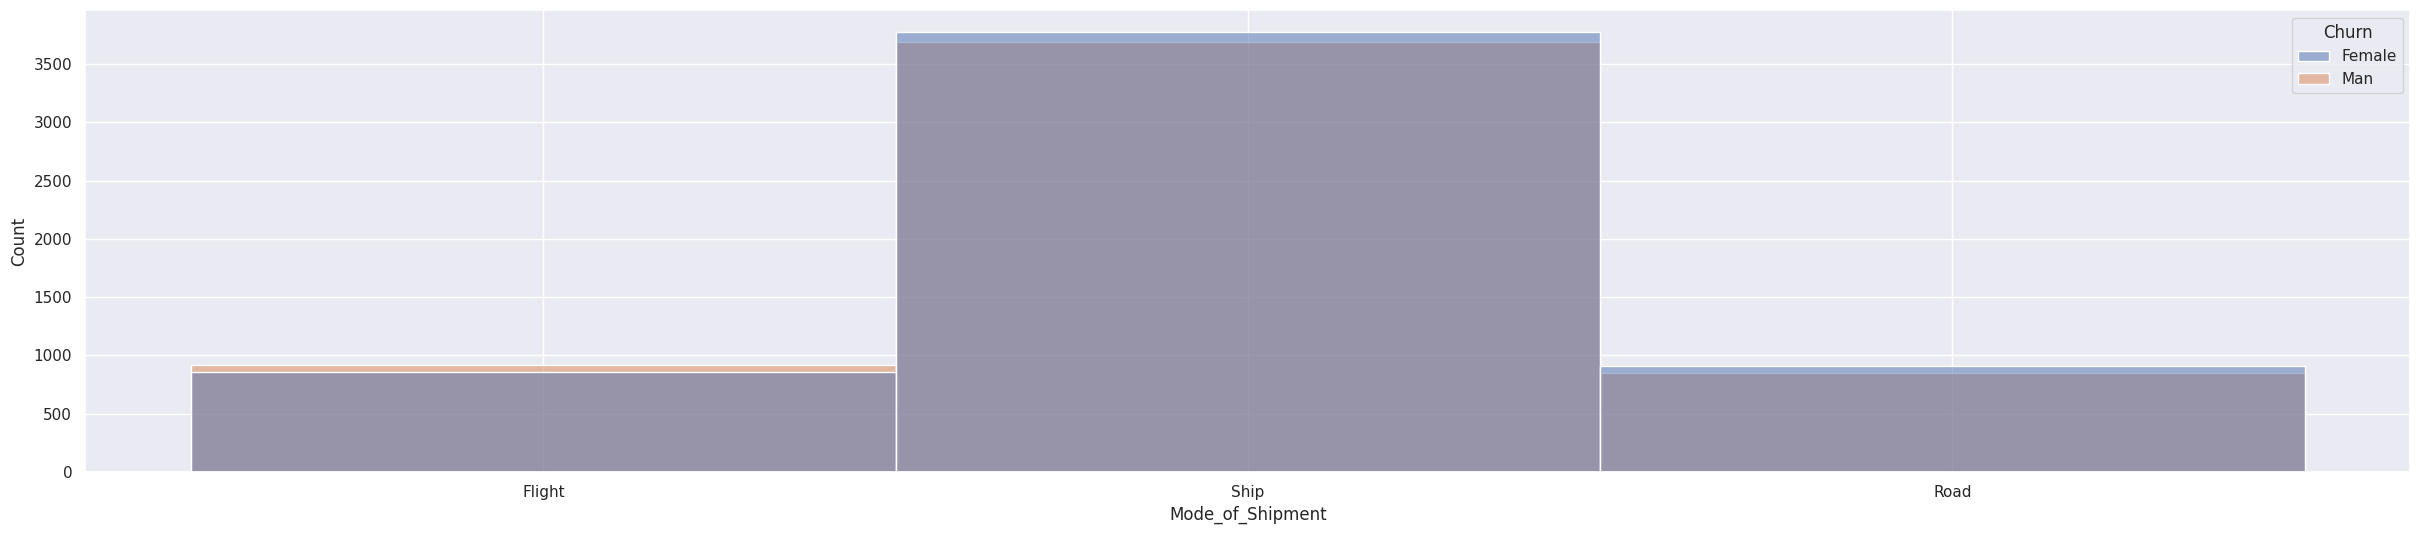

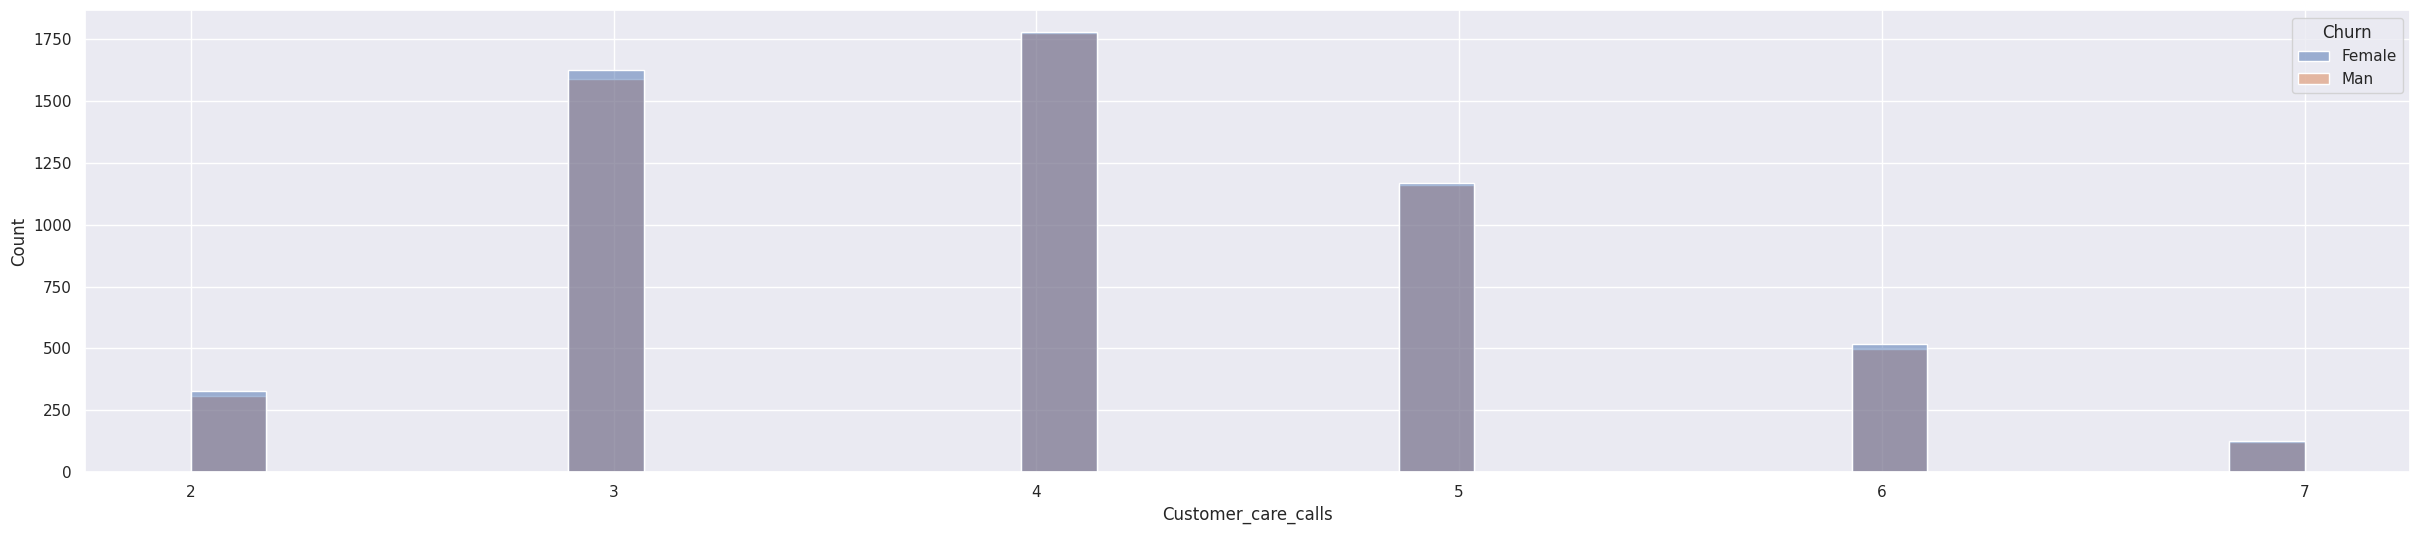

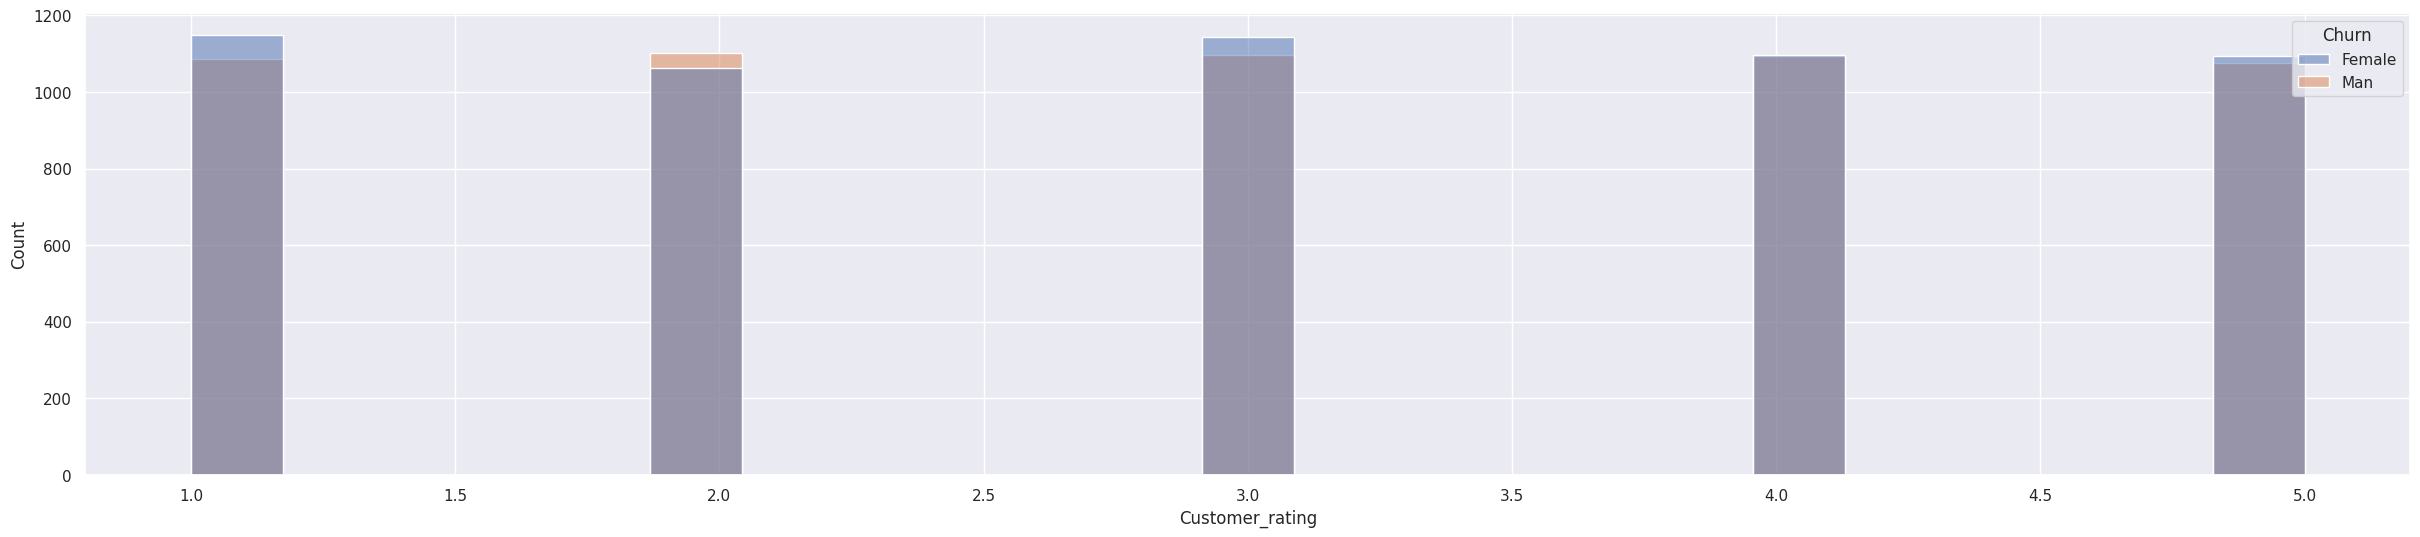

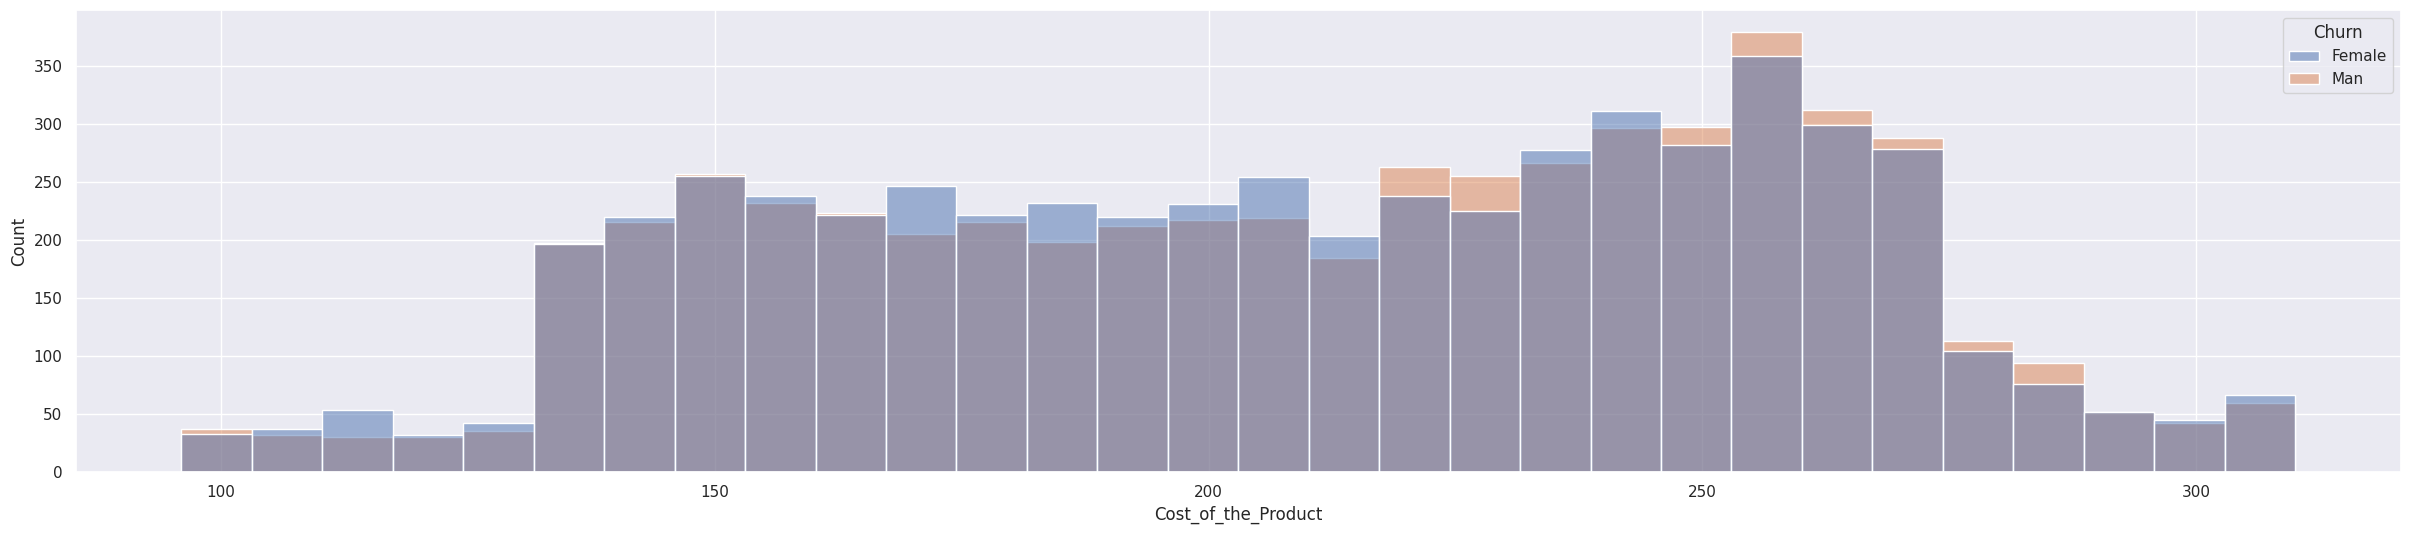

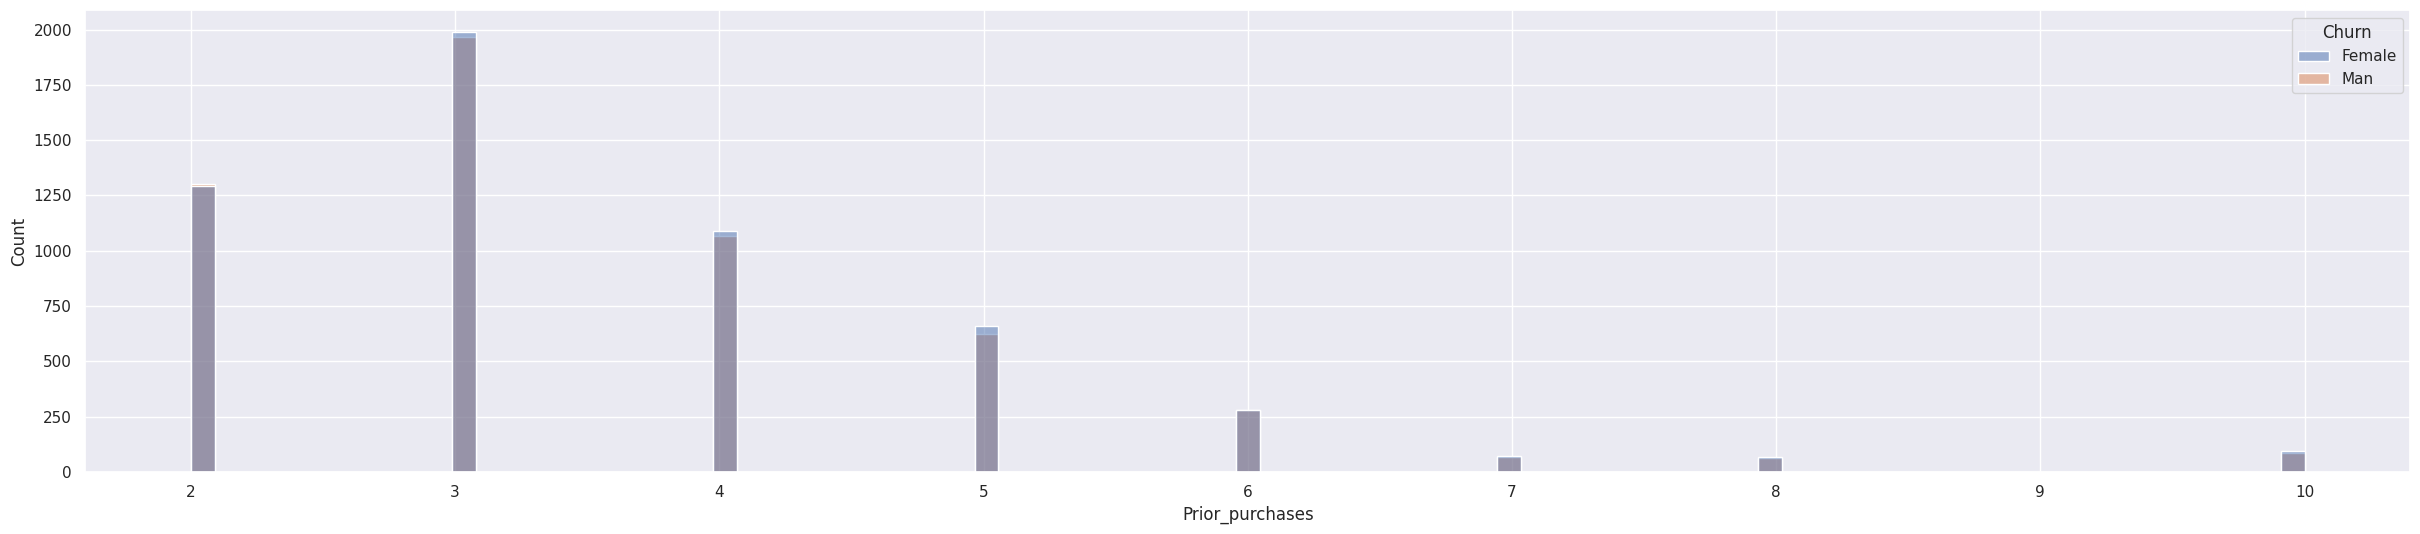

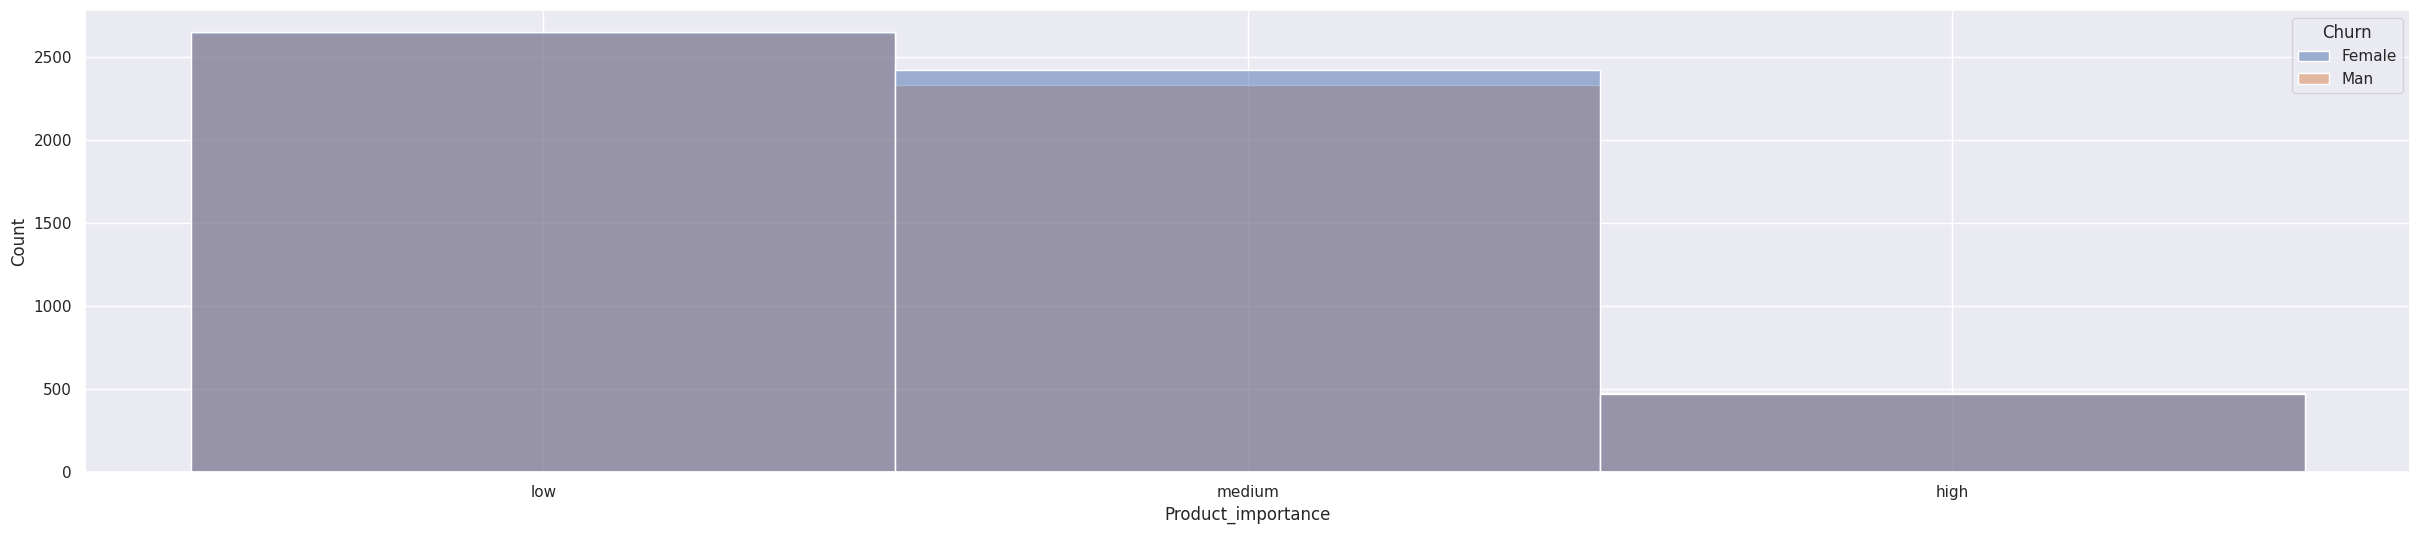

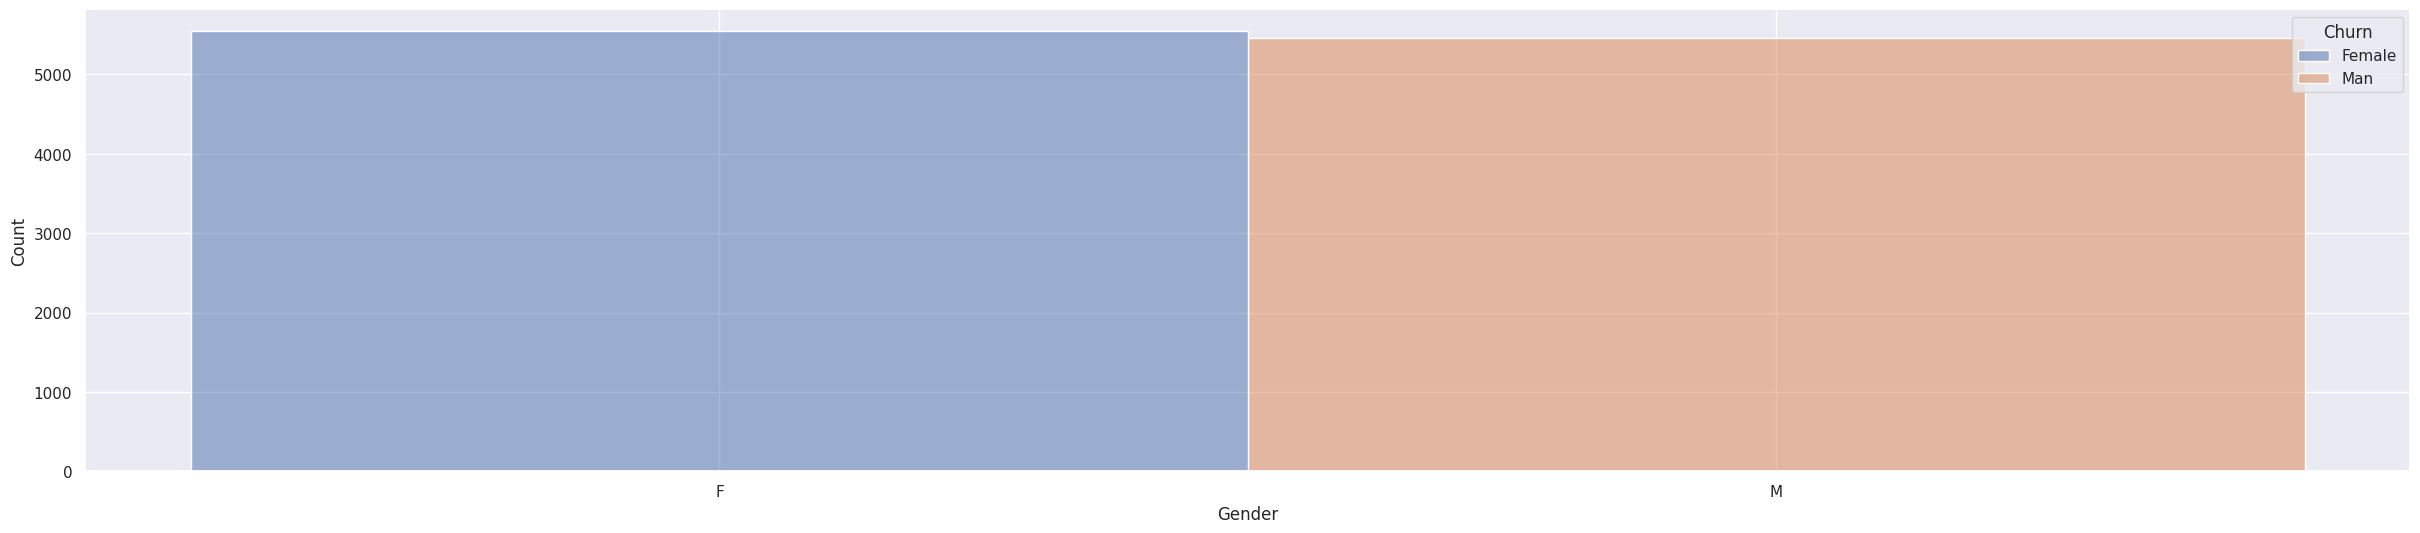

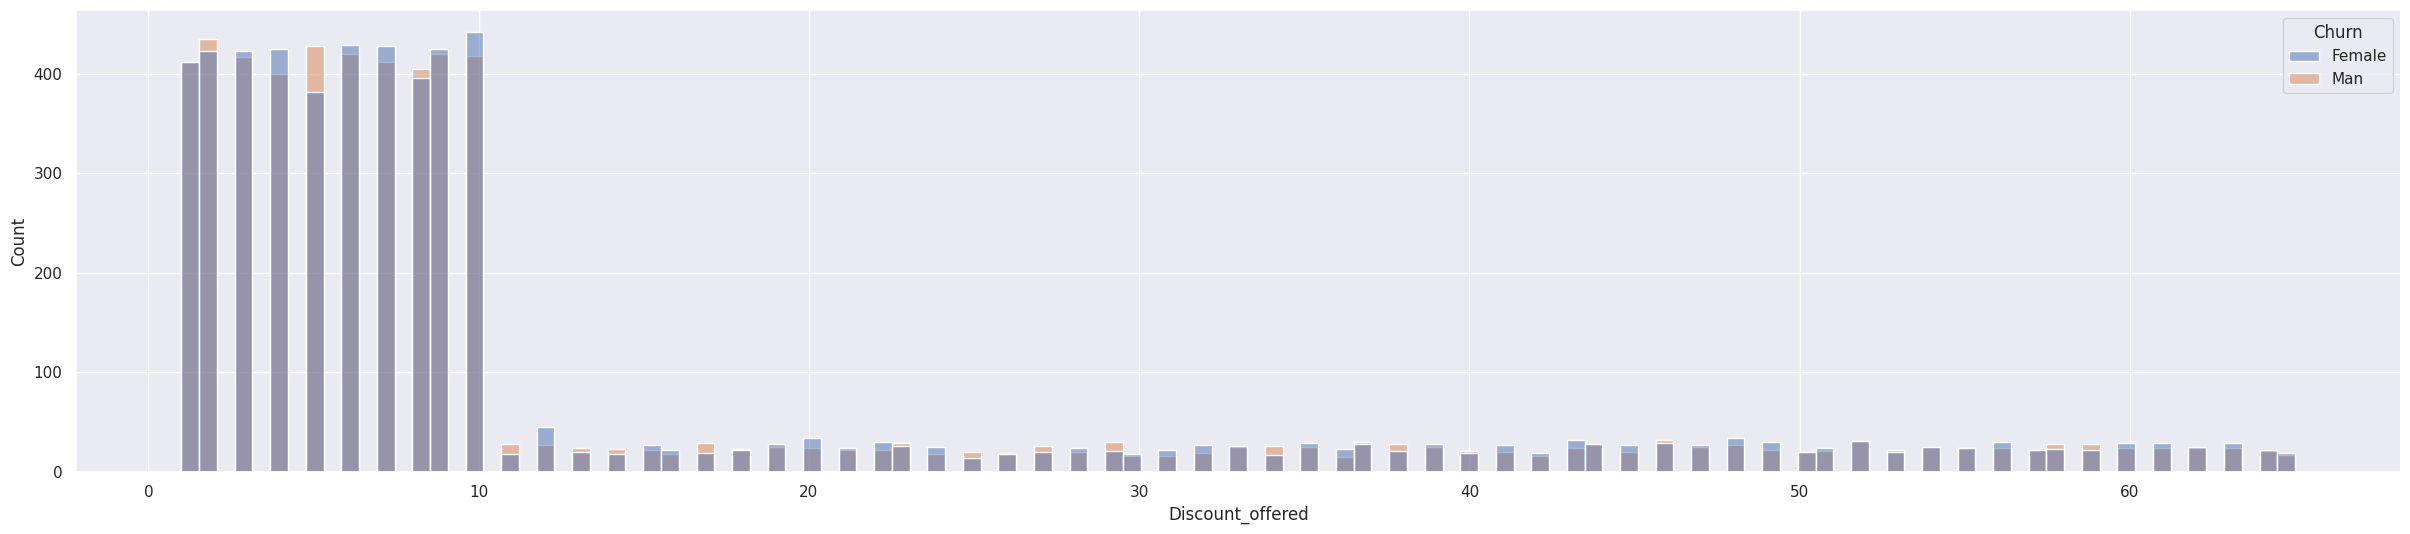

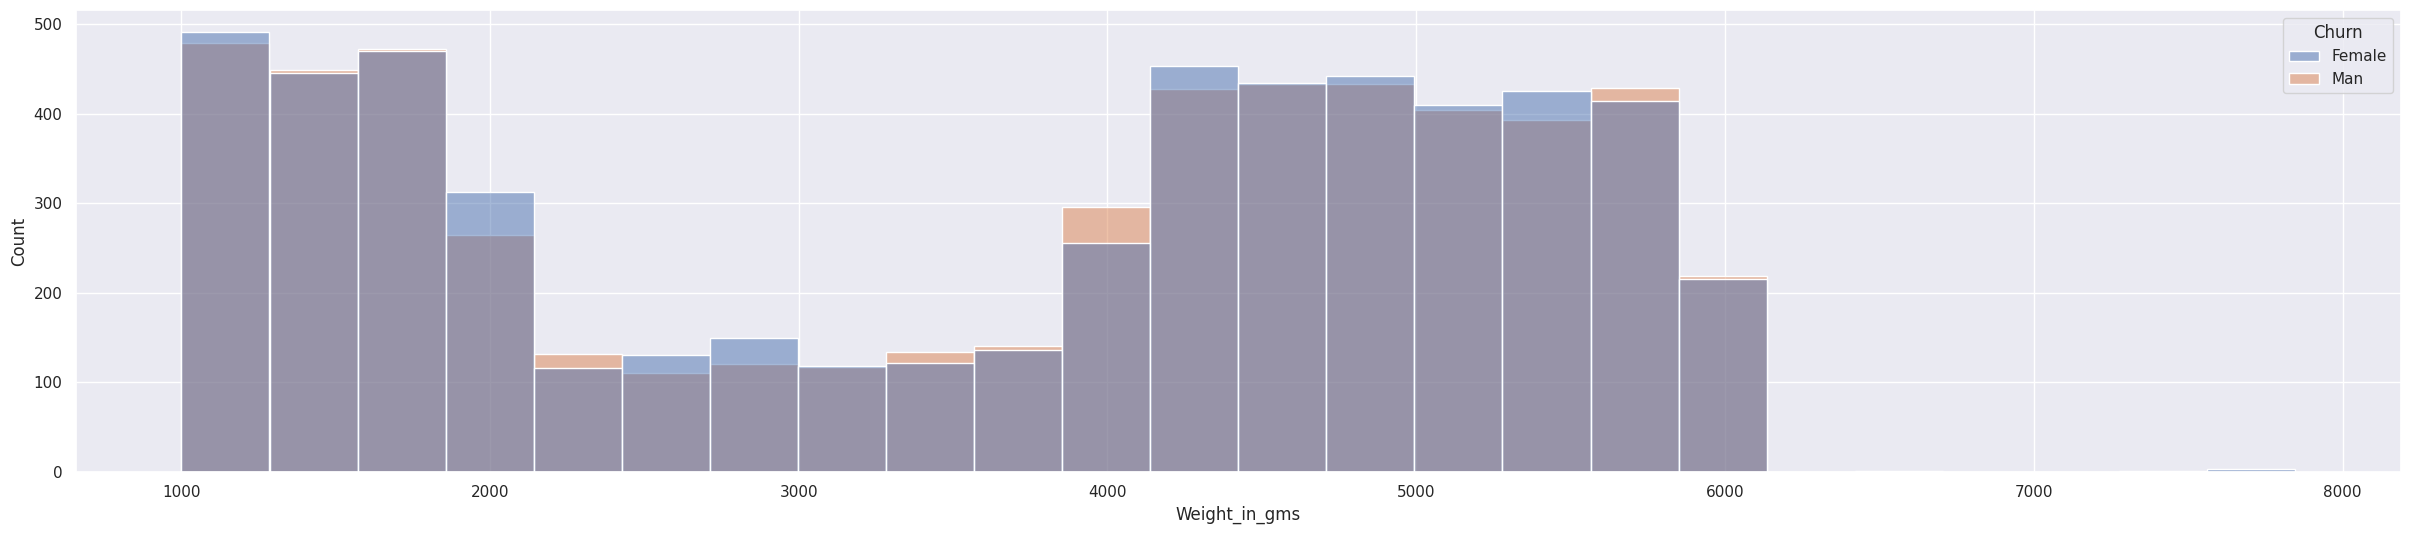

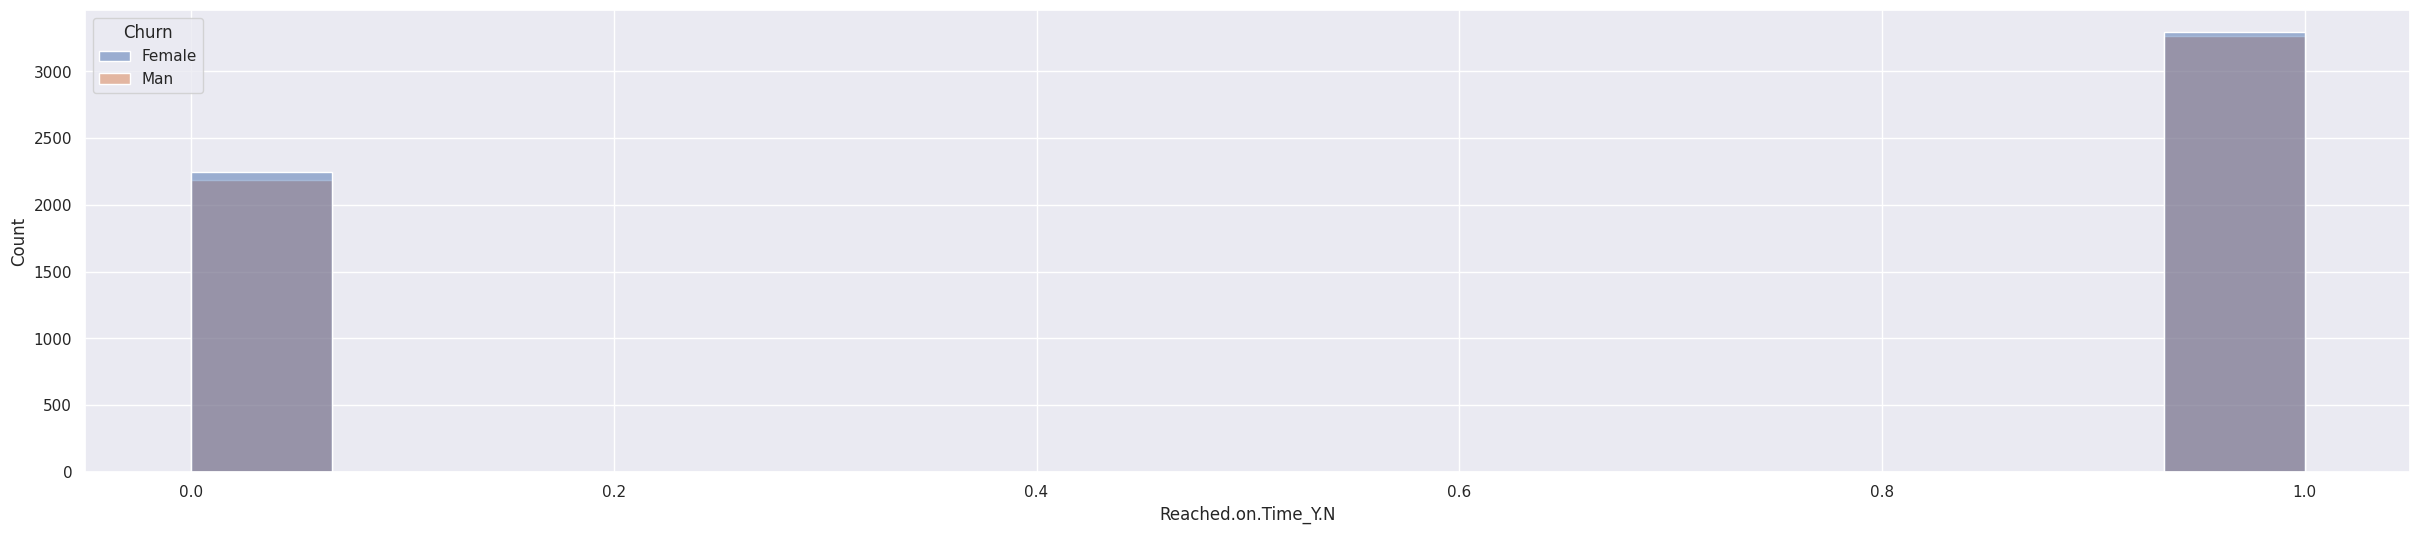

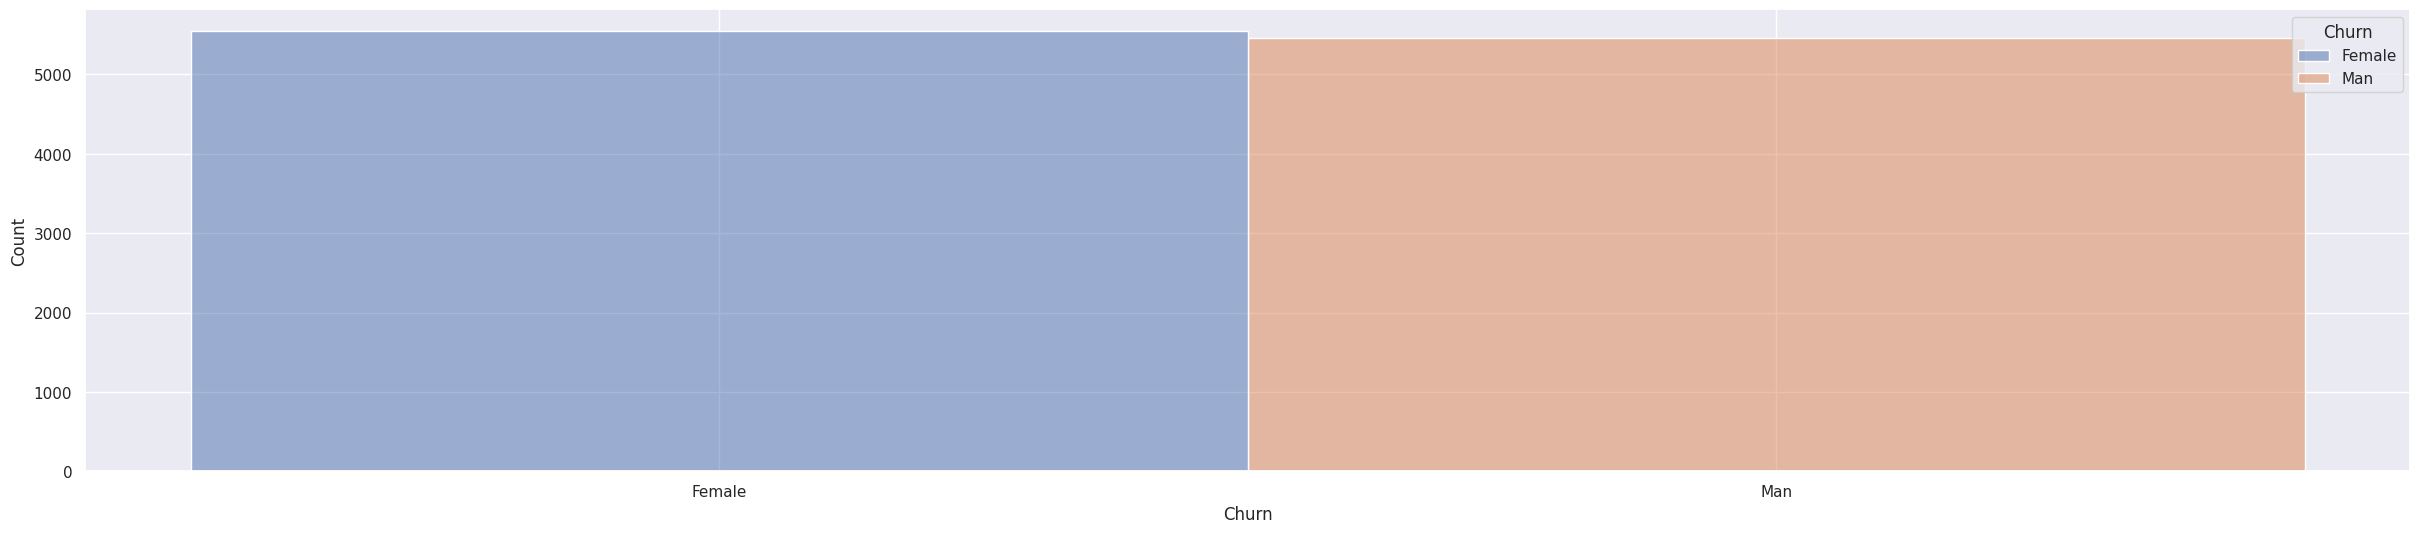

In [ ]:
for feature in num:
    fig, ax = plt.subplots(figsize=(30, 6))
    exp2(feature)

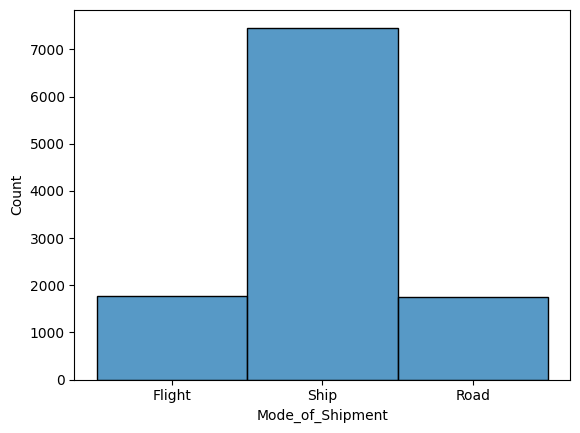

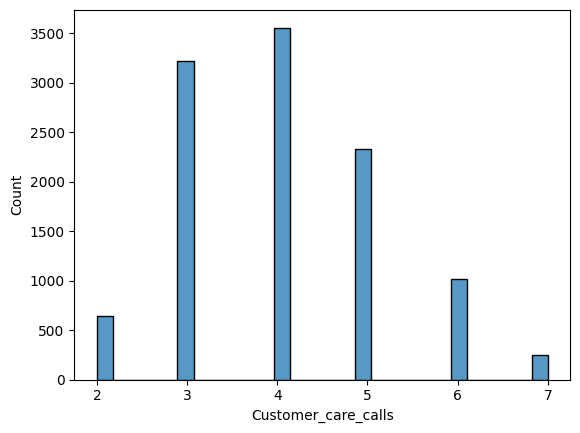

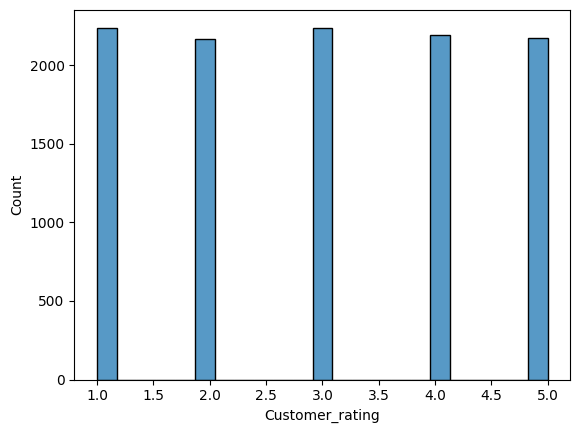

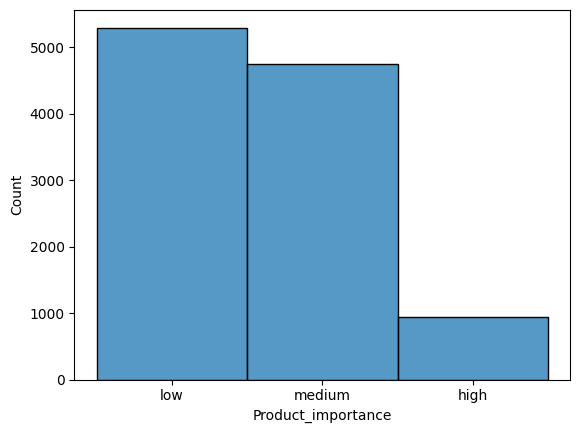

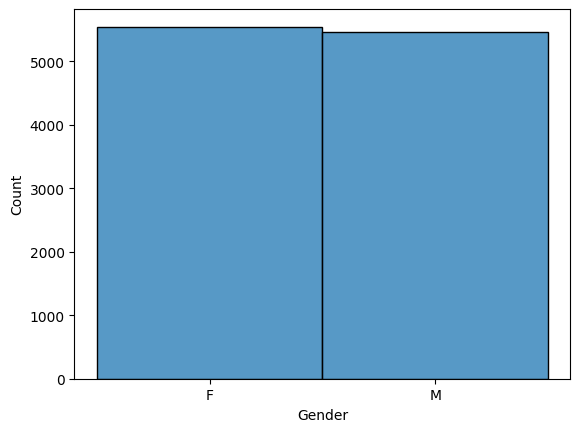

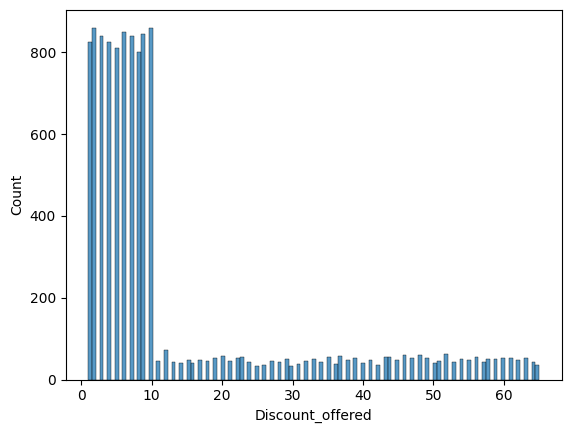

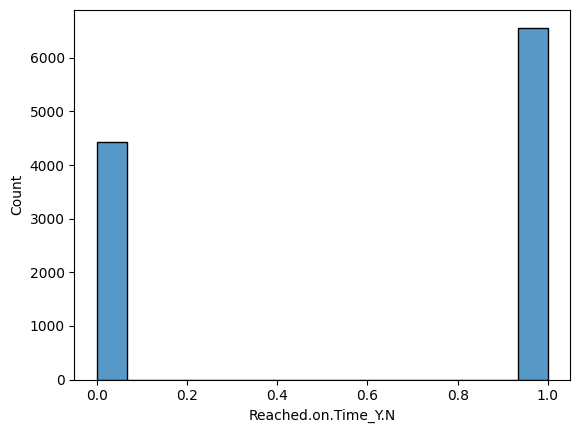

In [ ]:
def exp2(columns):
    sns.histplot(data=df, x=columns)
    plt.show()

cat_cols_for_wrangling = ['Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Product_importance', 'Gender', 'Discount_offered', 'Reached.on.Time_Y.N']
for feature in cat_cols_for_wrangling:
    exp2(feature)


In [ ]:
pivot_table = df.groupby(["Prior_purchases", "Discount_offered"])["ID"].count().reset_index()
pivot_table.columns = ["Prior_purchases", "Discount_offered", "Cost_of_the_Product"]


print(pivot_table)

     Prior_purchases  Discount_offered  Cost_of_the_Product
0                  2                 1                  187
1                  2                 2                  205
2                  2                 3                  168
3                  2                 4                  176
4                  2                 5                  161
..               ...               ...                  ...
427               10                57                    2
428               10                59                    1
429               10                61                    1
430               10                63                    1
431               10                64                    1

[432 rows x 3 columns]


In [ ]:
df.groupby(by=["Warehouse_block", "Prior_purchases", "Discount_offered"]).agg({
    "Cost_of_the_Product": "sum",
    })

Cost_of_the_Product
Warehouse_block Prior_purchases Discount_offered                     
A               2               1                                5884
                                2                                8680
                                3                                4528
                                4                                5684
                                5                                6372
...                                                               ...
F               10              45                                186
                                48                                154
                                53                                133
                                61                                247
                                64                                186

[1407 rows x 1 columns]

# **MBA (Market Basket Analisis)**

In [ ]:
gudang = df["Warehouse_block"].value_counts()
gudang

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


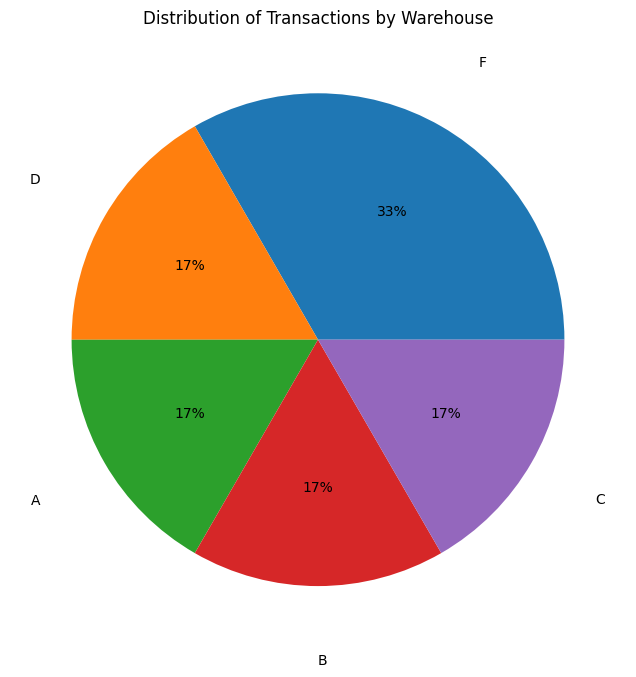

In [ ]:
plt.figure(figsize=[8,8])
plt.pie(gudang,labels=gudang.index, autopct = '%0.0f%%',labeldistance=1.3)
plt.title("Distribution of Transactions by Warehouse")
plt.show()

In [ ]:
gudang_f = df[df['Warehouse_block'] == 'F']
gudang_f

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
11,12,F,Flight,4,5,232,3,medium,F,32,3253,1
13,14,F,Flight,4,4,275,3,high,M,29,2602,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10985,10986,F,Ship,5,1,229,5,low,F,10,1040,1
10987,10988,F,Ship,5,3,242,5,low,F,10,1846,1
10991,10992,F,Ship,5,2,261,5,medium,M,9,1227,1
10993,10994,F,Ship,5,1,257,6,low,F,1,1150,0


In [ ]:
# Kelompokkan transaksi berdasarkan 'ID' dan ''
basket = df[df['Warehouse_block'] =="F"]\
         .groupby(['ID', 'Product_importance'])['Prior_purchases']\
         .sum().unstack()\
         .reset_index().fillna(0)\
         .set_index('ID')
basket

Product_importance,high,low,medium
ID,,,
2,0.0,2.0,0.0
6,0.0,0.0,3.0
8,0.0,2.0,0.0
12,0.0,0.0,3.0
14,3.0,0.0,0.0
...,...,...,...
10986,0.0,5.0,0.0
10988,0.0,5.0,0.0
10992,0.0,0.0,5.0


In [ ]:
# Filter data untuk hanya mencakup transaksi dengan setidaknya satu item
basket = basket[(basket > 0).sum(axis=1) >= 1]
basket

Product_importance,high,low,medium
ID,,,
2,0.0,2.0,0.0
6,0.0,0.0,3.0
8,0.0,2.0,0.0
12,0.0,0.0,3.0
14,3.0,0.0,0.0
...,...,...,...
10986,0.0,5.0,0.0
10988,0.0,5.0,0.0
10992,0.0,0.0,5.0


In [ ]:
# Kodekan transaksi menggunakan one-hot encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket = basket.applymap(encode_units)
basket

Product_importance,high,low,medium
ID,,,
2,0,1,0
6,0,0,1
8,0,1,0
12,0,0,1
14,1,0,0
...,...,...,...
10986,0,1,0
10988,0,1,0
10992,0,0,1


In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket, min_support=0.03, use_colnames=True)
frequent_itemsets


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.082651,(high)
1,0.484452,(low)
2,0.432897,(medium)


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
top_10_rules = rules.head(10)
top_10_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
#melihat apakah terdpat whitespace pada kolom Discount_offered
df[df['Discount_offered']==' ']

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


Distribusi Warehouse:

Terdapat empat gudang dengan distribusi transaksi sebagai berikut: F (33%), A (17%), B (17%), dan D (17%).


Analisis Transaksi Gudang F:

Dengan fokus pada Gudang F, analisis MBA dilakukan dengan mengelompokkan transaksi berdasarkan ID dan tingkat kepentingan produk.
Hasilnya, aturan asosiasi dapat diekstraksi, menunjukkan korelasi antara beberapa produk.

In [ ]:
# remove missing in Discount_offered (whitespace)
df = df[df['Discount_offered']!=' ']

In [ ]:
df[df['Discount_offered']==' ']

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


# **Kesimpulan Akhir**
Berdasarkan hasil penelitian, kita dapat menyimpulkan bahwa diskon yang ditawarkan memiliki pengaruh signifikan terhadap peningkatan penjualan produk. Hal ini diperkuat oleh hasil uji hipotesis pada model regresi linier. Oleh karena itu, strategi pemasaran dengan memberikan diskon dapat dianggap efektif untuk meningkatkan penjualan produk.


# **Rekomendasi**
**Optimalkan Strategi Diskon:**

Fokuskan diskon pada produk yang memiliki korelasi tinggi dengan peningkatan penjualan.

Sesuaikan strategi diskon berdasarkan karakteristik pembelian pelanggan.

**Peningkatan Layanan di Gudang F:**

Pertimbangkan peningkatan stok atau promosi khusus untuk produk di Gudang F.

Evaluasi kebijakan pengelolaan persediaan dan distribusi untuk memenuhi permintaan tinggi di gudang tersebut.